## 1.0 Starting the PreProcess analysis.

### Importing the libs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading the data

In [ ]:
fidcs_info = pd.read_csv("IM_230626_semNP.csv")

### Data Cleaning

In [ ]:
fidcs_info_df_cleaned = fidcs_info.dropna(subset=["Patrimonio_Liquido"])

In [ ]:
fidcs_info_defaulters = fidcs_info_df_cleaned["Carteira_Direitos_Aquisicao_Inadimplentes"]
fidcs_info_liquidy_patrimony = fidcs_info_df_cleaned["Patrimonio_Liquido"]

In [ ]:
default_rate = fidcs_info_defaulters/ fidcs_info_liquidy_patrimony
default_rate

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4360    0.0
4361    0.0
4362    0.0
4363    0.0
4364    0.0
Length: 4303, dtype: float64

In [ ]:
df_informe_mensal = fidcs_info.assign(default_rate_series=default_rate)

In [ ]:
list(default_rate)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
fidcs_info.columns.values

array(['ID_Participante', 'ID_Documento', 'SK_Documento', 'CNPJ',
       'Data_Competencia', 'Data_Entrega', 'CNPJ_Administrador',
       'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo',
       'Cotistas_Vinculados_Interesse', 'Prazo_Conversao_Cotas',
       'Tipo_Prazo_Conversao_Cotas', 'Prazo_Pagamento_Resgate',
       'Tipo_Prazo_Pagamento_Resgate', 'Ativo', 'Ativo_Disponibilidades',
       'Ativo_Carteira', 'Ativo_Direitos_Aquisicao',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Performar',
       'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
       'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
       'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
       'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais

In [ ]:
maintained_columns = []

for column in fidcs_info.columns:
    if not column.endswith("_Dias") and not column.startswith("Taxas"):
        maintained_columns.append(column)

fidcs_info_general_report = fidcs_info[maintained_columns]


fidcs_info_general_report['cotistas_senior'] = fidcs_info_general_report.filter(like='Numero_Cotistas_Senior').sum(axis=1)

fidcs_info_general_report['cotistas_subordinados'] = fidcs_info_general_report.filter(like='Numero_Cotistas_Subordinada').sum(axis=1)

fidcs_info_delete_columns = fidcs_info_general_report.columns[fidcs_info_general_report.columns.str.contains('([0-9_]Dias$|^Taxa)')]

fidcs_info_general_report = fidcs_info_general_report.drop(columns=fidcs_info_delete_columns)


<ipython-input-10-8f901462a8dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fidcs_info_general_report['cotistas_senior'] = fidcs_info_general_report.filter(like='Numero_Cotistas_Senior').sum(axis=1)
<ipython-input-10-8f901462a8dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fidcs_info_general_report['cotistas_subordinados'] = fidcs_info_general_report.filter(like='Numero_Cotistas_Subordinada').sum(axis=1)
<ipython-input-10-8f901462a8dc>:14: UserWarning: This pattern is interpreted as a regular e

In [ ]:
list(fidcs_info_general_report)

['ID_Participante',
 'ID_Documento',
 'SK_Documento',
 'CNPJ',
 'Data_Competencia',
 'Data_Entrega',
 'CNPJ_Administrador',
 'Nome_Administrador',
 'Forma_Condominio',
 'Fundo_Exclusivo',
 'Cotistas_Vinculados_Interesse',
 'Prazo_Conversao_Cotas',
 'Tipo_Prazo_Conversao_Cotas',
 'Prazo_Pagamento_Resgate',
 'Tipo_Prazo_Pagamento_Resgate',
 'Ativo',
 'Ativo_Disponibilidades',
 'Ativo_Carteira',
 'Ativo_Direitos_Aquisicao',
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
 'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Aquisicao_Creditos_Fator_Risco',
 'Ativo_Direitos_Aquisicao_Cred

In [ ]:
# List of columns to remove from the DataFrame df_informe_geral

remove = ['ID_Participante', 'CNPJ', 'Data_Competencia', 'Data_Entrega', 'CNPJ_Administrador', 'Nome_Administrador', 'Cotistas_Vinculados_Interesse']

clean_df = ['Garantias_Valor_Total', 'Garantias_Percentual', 'Carteira_Direitos_Sem_Aquisicao_Prazo_1_30_dias', 'Carteira_Direitos_Aquisicao_Prazo_1_30_dias', 'Prazo_Pagamento_Resgate', 'Tipo_Prazo_Pagamento_Resgate']

carteira_remove = [ 'Carteira_Industrial',
 'Carteira_Mercado_Imobiliario',
 'Carteira_Comercial_Total',
 'Carteira_Comercial',
 'Carteira_Comercial_Varejo',
 'Carteira_Arrendamento_Mercantil',
 'Carteira_Servicos_Total',
 'Carteira_Servicos',
 'Carteira_Servicos_Publicos',
 'Carteira_Servicos_Educacionais',
 'Carteira_Entretenimento',
 'Carteira_Agronegocio',
 'Carteira_Financeiro',
 'Carteira_Credito Pessoal',
 'Carteira_Credito_Pessoal_Consignado',
 'Carteira_Credito_Corporativo',
 'Carteira_Middle_Market',
 'Carteira_Veiculos',
 'Carteira_Imobiliaria_Empresarial',
 'Carteira_Imobiliaria_Residencial',
 'Carteira_Outros_Financeiro',
 'Carteira_Cartao_Credito',
 'Carteira_Factoring',
 'Carteira_Factoring_Pessoal',
 'Carteira_Factoring_Corporativo',
 'Carteira_Setor_Publico',
 'Carteira_Precatorios',
 'Carteira_Creditos_Tributarios',
 'Carteira_Royalties',
 'Carteira_Outros_Setor_Publico',
 'Carteira_Acoes_Judiciais',
 'Carteira_Propriedade_Intelectual',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_1_30_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_31_60_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_61_90_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_91_120_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_121_150_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_151_180_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_181_360_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_361_720_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_721_1080_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Pagos_Acima_1080_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_31_60_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_61_90_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_91_120_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_121_150_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_151_180_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_181_360_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_361_720_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_721_1080_Dias',
 'Carteira_Direitos_Aquisicao_Prazo_Acima_1080_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_1_30_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_31_60_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_61_90_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_91_120_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_121_150_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_151_180_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_181_360_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_361_720_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_721_1080_Dias',
 'Carteira_Direitos_Aquisicao_Inadimplentes_Acima_1080_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_1_30_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_31_60_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_61_90_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_91_120_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_121_150_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_151_180_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_181_360_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_361_720_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_721_1080_Dias',
 'Carteira_Direitos_Aquisicao_Pagos_Acima_1080_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_31_60_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_61_90_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_91_120_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_121_150_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_151_180_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_181_360_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_361_720_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_721_1080_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Prazo_Acima_1080_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_1_30_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_31_60_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_61_90_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_91_120_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_121_150_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_151_180_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_181_360_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_361_720_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_721_1080_Dias',
 'Carteira_Direitos_Sem_Aquisicao_Inadimplentes_Acima_1080_Dias']

passivo_remove = ['Passivo_A_Pagar',
 'Passivo_Curto_Prazo',
 'Passivo_Longo_Prazo',
 'Passivo_Posicao_Derivativos',
 'Passivo_Mercado_Termo',
 'Passivo_Mercado_Opcoes',
 'Passivo_Mercado_Futuro',
 'Passivo_Diferencial_Swap',]

ativo_remove = [
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
 'Ativo_Direitos_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
 'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Aquisicao_Creditos_Fator_Risco',
 'Ativo_Direitos_Aquisicao_Creditos_Diversos',
 'Ativo_Direitos_Aquisicao_Provisao_Reducao',
 'Ativo_Direitos_Sem_Aquisicao',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Adimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencer_Inadimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Parcelas_Inadimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Inadimplentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Performar',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Vencidos_Pendentes',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Empresas_Recuperacao',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Receitas_Publicas',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Acoes_Judiciais',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Fator_Risco',
 'Ativo_Direitos_Sem_Aquisicao_Creditos_Diversos',
 'Ativo_Direitos_Sem_Aquisicao_Provisao_Reducao',
 'Ativo_Valores_Mobiliarios',
 'Ativo_Debentures',
 'Ativo_CRI',
 'Ativo_Notas_Promissorias',
 'Ativo_Letras Financeiras',
 'Ativo_Cotas_Fundos_ICVM_555',
 'Ativo_Outros_Valores_Mobiliarios',
 'Ativo_Titulos_Federais',
 'Ativo_CDB',
 'Ativo_Operacoes_Compromissadas',
 'Ativo_Outros_Ativos_Renda_Fixa',
 'Ativo_Cotas_FIDC',
 'Ativo_Cotas_FIDC_NP',
 'Ativo_Warrants',
 'Ativo_Provisao_Debentures_CRI_NP_LF',
 'Ativo_Provisao_Cotas_FIDC',
 'Ativo_Provisao_Outros_Ativos',
 'Ativo_Posicao_Derivativos',
 'Ativo_Mercado_Termo',
 'Ativo_Mercado_Opcoes',
 'Ativo_Mercado_Futuro',
 'Ativo_Diferencial_Swap',
 'Ativo_Coberturas_Prestadas',
 'Ativo_Depositos_Margem',
 'Ativo_Outros',
 'Ativo_Curto_Prazo',
 'Ativo_Longo Prazo',]

negocios_remove = ['Negocios_Aquisicoes_Direitos_Aquisicao_Quantidade',
 'Negocios_Aquisicoes_Direitos_Aquisicao_Valor',
 'Negocios_Aquisicoes_Direitos_Sem_Aquisicao_Quantidade',
 'Negocios_Aquisicoes_Direitos_Sem_Aquisicao_Valor',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Adimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Adimplentes_Valor',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Inadimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Vencer_Parcelas_Inadimplentes_Valor',
 'Negocios_Aquisicoes_Direitos_Inadimplentes_Quantidade',
 'Negocios_Aquisicoes_Direitos_Inadimplentes_Valor',
 'Negocios_Alienacoes_Cedente_Quantidade',
 'Negocios_Alienacoes_Cedente_Valor',
 'Negocios_Alienacoes_Cedente_Valor_Contabil',
 'Negocios_Alienacoes_Prestadores_Quantidade',
 'Negocios_Alienacoes_Prestadores_Valor',
 'Negocios_Alienacoes_Prestadores_Valor_Contabil',
 'Negocios_Alienacoes_Terceiros_Quantidade',
 'Negocios_Alienacoes_Terceiros_Valor',
 'Negocios_Alienacoes_Terceiros_Valor_Contabil',
 'Negocios_Substituicoes_Quantidade',
 'Negocios_Substituicoes_Valor',
 'Negocios_Substituicoes_Valor_Contabil',
 'Negocios_Recompras_Quantidade',
 'Negocios_Recompras_Valor',
 'Negocios_Recompras_Valor_Contabil']

cotistas_tipo = ['Numero_Cotistas_Senior_Pessoa_Fisica',
 'Numero_Cotistas_Senior_Pessoa_Juridica_Nao_Financeira',
 'Numero_Cotistas_Senior_Banco_Comercial',
 'Numero_Cotistas_Senior_Corretora_Distribuidora',
 'Numero_Cotistas_Senior_Pessoa_Juridica_Financeira',
 'Numero_Cotistas_Senior_Investidor_Nao_Residente',
 'Numero_Cotistas_Senior_Entidade_Aberta_Previdencia_Complementar',
 'Numero_Cotistas_Senior_Entidade_Fechada_Previdencia_Complementar',
 'Numero_Cotistas_Senior_Regime_Proprio_Previdencia_Servidores_Publicos',
 'Numero_Cotistas_Senior_Sociedade_Seguradora',
 'Numero_Cotistas_Senior_Sociedade_Capitalizacao',
 'Numero_Cotistas_Senior_FIC_FIDC',
 'Numero_Cotistas_Senior_FII',
 'Numero_Cotistas_Senior_Outros_Fundos',
 'Numero_Cotistas_Senior_Clube_Investimento',
 'Numero_Cotistas_Senior_Outros',
 'Numero_Cotistas_Subordinada_Pessoa_Fisica',
 'Numero_Cotistas_Subordinada_Pessoa_Juridica_Nao_Financeira',
 'Numero_Cotistas_Subordinada_Banco_Comercial',
 'Numero_Cotistas_Subordinada_Corretora_Distribuidora',
 'Numero_Cotistas_Subordinada_Pessoa_Juridica_Financeira',
 'Numero_Cotistas_Subordinada_Investidor_Nao_Residente',
 'Numero_Cotistas_Subordinada_Entidade_Aberta_Previdencia_Complementar',
 'Numero_Cotistas_Subordinada_Entidade_Fechada_Previdencia_Complementar',
 'Numero_Cotistas_Subordinada_Regime_Proprio_Previdencia_Servidores_Publicos',
 'Numero_Cotistas_Subordinada_Sociedade_Seguradora',
 'Numero_Cotistas_Subordinada_Sociedade_Capitalizacao',
 'Numero_Cotistas_Subordinada_FIC_FIDC',
 'Numero_Cotistas_Subordinada_FII',
 'Numero_Cotistas_Subordinada_Outros_Fundos',
 'Numero_Cotistas_Subordinada_Clube_Investimento',
 'Numero_Cotistas_Subordinada_Outros',]

liquidy_remove = [
    'Liquidez_Ate_30_Dias',
    'Liquidez_Ate_60_Dias',
    'Liquidez_Ate_90_Dias',
    'Liquidez_Ate_180_Dias',
    'Liquidez_Ate_360_Dias',
    'Liquidez_Acima_360_Dias'
]

# Remove the specified columns from the df_informe_geral DataFrame.
df_informe_relacao = fidcs_info.drop(remove + clean_df + carteira_remove + passivo_remove + ativo_remove + negocios_remove + cotistas_tipo + liquidy_remove, axis=1)

# Display the first few rows of the DataFrame df_informe_relacao after the removal.
df_informe_relacao.head()

,ID_Documento,SK_Documento,Forma_Condominio,Fundo_Exclusivo,Prazo_Conversao_Cotas,Tipo_Prazo_Conversao_Cotas,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,...,Taxas_Renda_Fixa_Desconto_Venda_Maxima,Taxas_Renda_Fixa_Juros_Compra_Minina,Taxas_Renda_Fixa_Juros_Compra_Media_Ponderada,Taxas_Renda_Fixa_Juros_Compra_Maxima,Taxas_Renda_Fixa_Juros_Venda_Minina,Taxas_Renda_Fixa_Juros_Venda_Media_Ponderada,Taxas_Renda_Fixa_Juros_Venda_Maxima,Liquidez_Imediata,Sistema_Origem,Nome_Fundo
0,130046,FNET|130046,FECHADO,Não,NaN,NaN,45934082.29,620.12,45932784.27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
1,137253,FNET|137253,FECHADO,Não,NaN,NaN,46553229.85,8240.53,46544638.95,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
2,242626,FNET|242626,FECHADO,Não,NaN,NaN,55523268.08,9556.81,55512990.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
3,253264,FNET|253264,FECHADO,Não,NaN,NaN,57203413.12,2625.95,57200544.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
4,263165,FNET|263165,FECHADO,Não,NaN,NaN,58470532.54,2443.66,58468088.88,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...


In [ ]:
df_informe_relacao.shape

(4365, 95)

<Figure size 10000x10000 with 0 Axes>

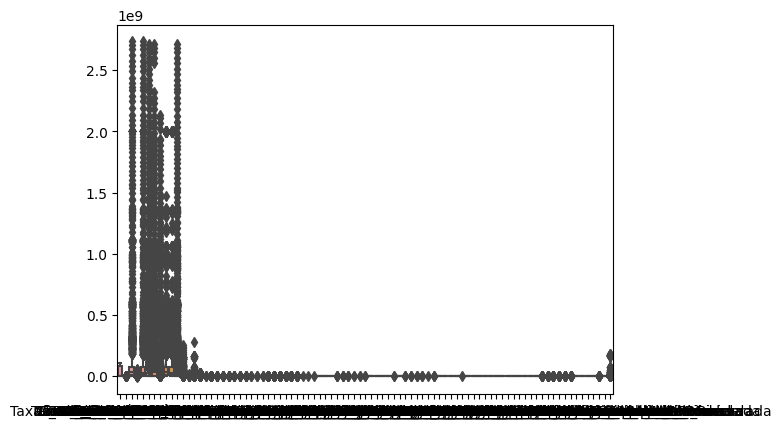

<Figure size 10000x10000 with 0 Axes>

In [ ]:
sns.boxplot(df_informe_relacao)
plt.figure(figsize=(100, 100))